<a href="https://colab.research.google.com/github/electrojam/Analisis-de-datos-de-salud-mental/blob/main/Mental_Health_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Salud Mental

### 1. Introduccion
Este proyecto busca encontrar factores que estén relacionados con salud mental en trabajadores, en específico con la depresión y ansiedad, mediante la exploración y análisis de datos de un dataframe de kaggle.

### 2. Importación de librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

### 3. Carga y exploración de datos
Los datos descagados de Kaggle, es una simulación realista de las respuestas de una encuesta global de la salud mental de 10.000 personas.

In [9]:
#Cargamos dataset y visualizamos
df = pd.read_csv("mental_health_dataset.csv")

df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

### El dataset cuenta con:
- 10.000 filas o registros
- 14 Columnas o features
- No tiene valores nulos

In [14]:
df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [ ]:
# Calculate correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Explore unique values and counts for categorical columns
categorical_cols = ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'mental_health_risk']
print("\nUnique Values and Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    display(df[col].value_counts())

# Calculate average depression and anxiety scores grouped by categorical variables
print("\nAverage Depression and Anxiety Scores Grouped by Categorical Variables:")
for col in categorical_cols:
    print(f"\nGrouping by: {col}")
    grouped_scores = df.groupby(col)[['depression_score', 'anxiety_score']].mean()
    display(grouped_scores)

In [17]:
#Calculamos la matriz de correlaciónde las variables numéricas
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)


,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
age,1.000000,-0.015630,0.008407,-0.003887,-0.001486,0.024784,0.011130,0.001671
stress_level,-0.015630,1.000000,-0.003352,0.000006,-0.001696,0.012240,0.019774,0.007295
sleep_hours,0.008407,-0.003352,1.000000,-0.000870,0.005076,-0.004457,0.002663,-0.009230
physical_activity_days,-0.003887,0.000006,-0.000870,1.000000,0.009416,-0.001656,-0.009611,-0.010163
depression_score,-0.001486,-0.001696,0.005076,0.009416,1.000000,0.011036,0.002559,-0.939149
anxiety_score,0.024784,0.012240,-0.004457,-0.001656,0.011036,1.000000,-0.018487,-0.009134
social_support_score,0.011130,0.019774,0.002663,-0.009611,0.002559,-0.018487,1.000000,0.001069
productivity_score,0.001671,0.007295,-0.009230,-0.010163,-0.939149,-0.009134,0.001069,1.000000


### Edad

<Axes: ylabel='age'>

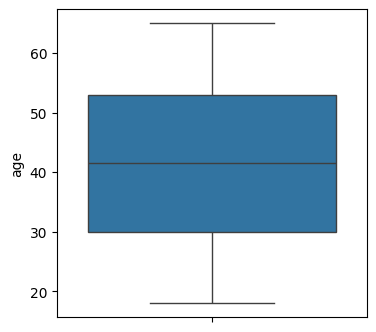

In [26]:
#Graficamos boxplot de la variable numérica edad
plt.figure(figsize=(4,4))
sns.boxplot(data=df, y='age')

 * La mediana de la edad de los encuestados = 41 años.
 * 25% <= 30 años o menos.
 * 75% <= 53 años o menos.
 * Rango entre 18 a 64 años.

### Estrés, Horas de sueño y Días de actividad Física

<Axes: >

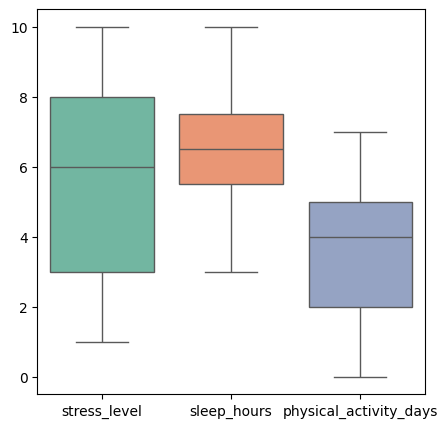

In [31]:
#Graficamos bloxplot entre estrés, Horas de sueño y Días de actividad Física
fig, axs = plt.subplots(figsize=(5,5))
sns.boxplot(data=df[['stress_level', 'sleep_hours', 'physical_activity_days']], palette="Set2")

##### Nivel de estrés
* La mediana = 6 horas
* 25% <= 3 (El 25% tiene nivelde estrés 3 o menos).
* 75% <= 8 (El 75% tiene nivelde estrés 8 o menos).
* Rango de estrés entre 1 y 10.

##### Horas de sueño
* La mediana = 6.5 horas
* 25% <= 5.5 horas (El 25% duerme 5.5 horas o menos).
* 75% <= 7.5 horas (El 75% duerme 7.5 horas o menos).
* Rango de horas de sueño entre 3 y 10.

##### Días de actividad física
* La mediana = 4 dias
* 25% <= 5.5 horas (El 25% se ejercita 2 dias o menos).
* 75% <= 7.5 horas (El 75% se ejercita 5 dias o menos).
* Rango de dias de ejercicio entre 0 y 7.

In [37]:
categorical_columns = ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'mental_health_risk']
df[categorical_columns].describe()

,gender,employment_status,work_environment,mental_health_history,seeks_treatment,mental_health_risk
count,10000,10000,10000,10000,10000,10000
unique,4,4,3,2,2,3
top,Male,Employed,On-site,No,No,Medium
freq,4557,5868,5044,6969,6012,5892


##### De acuerdo con las variables categóricas, podemos determinar que la mayoría de los encuestados:
* Son de género Masculino.
* Son empleados.
* Trabajan en su lugar de trabajo.
* No tiene antecedentes de salud mental.
* No están en tratamiento médico.
* Tiene riesgo medio de salud mental.

### Clasificacion de Variable nivel de ansiedad y depresion.
De acuerdo con el test denominado "GAD-7 – Trastorno de Ansiedad Generalizada (Generalized Anxiety Disorder-7)" herramienta ampliamente utilizada por psicólogos, psiquiatras y médicos - que en base a las respuestas de los pacientes se establece la siguientedata:

* Puntuacion de ansiedad del 0 al 21 basado en test GAD-7.

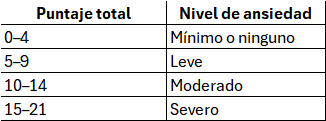


<Axes: xlabel='anxiety_level', ylabel='count'>

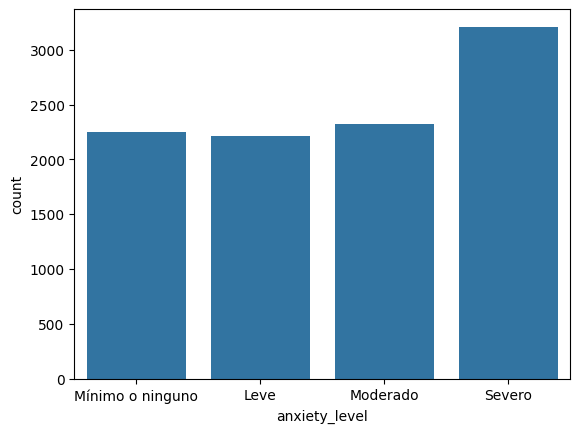

In [46]:
rangos_ansiedad = [0, 4, 9, 14, 21]
categorias_ansiedad = ['Mínimo o ninguno', 'Leve', 'Moderado', 'Severo']

df['anxiety_level'] = pd.cut(df['anxiety_score'], bins=rangos_ansiedad, labels=categorias_ansiedad, include_lowest=True)

sns.countplot(data=df, x='anxiety_level')

##### Se puede determinar que más de 3000 encuestados sufren de ansiedad severa de 15 a 21 puntos.

In [47]:
df['anxiety_level'].value_counts(normalize=True) * 100

,proportion
anxiety_level,
Severo,32.06
Moderado,23.27
Mínimo o ninguno,22.50
Leve,22.17


##### Podemos determinar que el 55.33% de los encuestados padecen de ansiedad moderada o severa.

De la misma manera que con la ansiedad para analizar los niveles de ansiedad, tomaremos el test PHQ-9 – Cuestionario de Salud del Paciente (Patient Health Questionnaire-9). De cual se desprende la siguiente escala.

* Puntuacion de ansiedad del 0 al 27 basado en test PHQ-9. Puntaje total Nivel de depresión

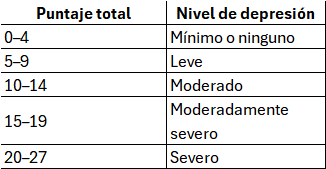

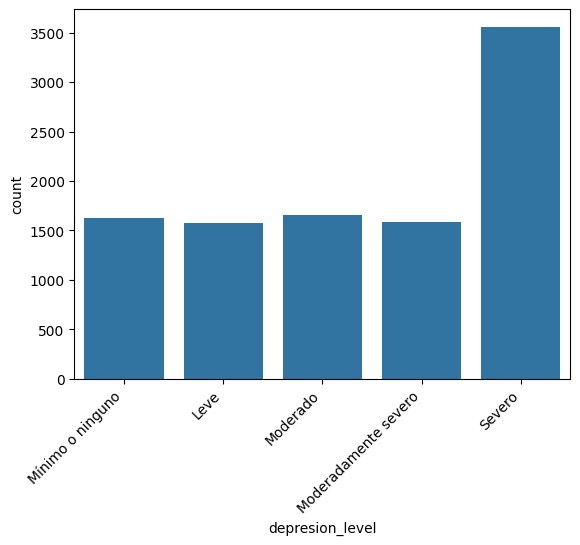

In [58]:
rangos_depresion = [0, 4, 9, 14, 19, 30]
categorias_depresion = ['Mínimo o ninguno', 'Leve', 'Moderado', 'Moderadamente severo', 'Severo']

df['depresion_level'] = pd.cut(df['depression_score'], bins=rangos_depresion, labels=categorias_depresion, include_lowest=True)

ax = sns.countplot(data=df, x='depresion_level')
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
##Sacamos % de categoria de depresión.

df['depresion_level'].value_counts(normalize=True) * 100

,proportion
depresion_level,
Severo,35.58
Moderado,16.61
Mínimo o ninguno,16.22
Moderadamente severo,15.81
Leve,15.78


##### Podemos observar que un 68% de los encuetados padecen depresión entre moderarda y severa.

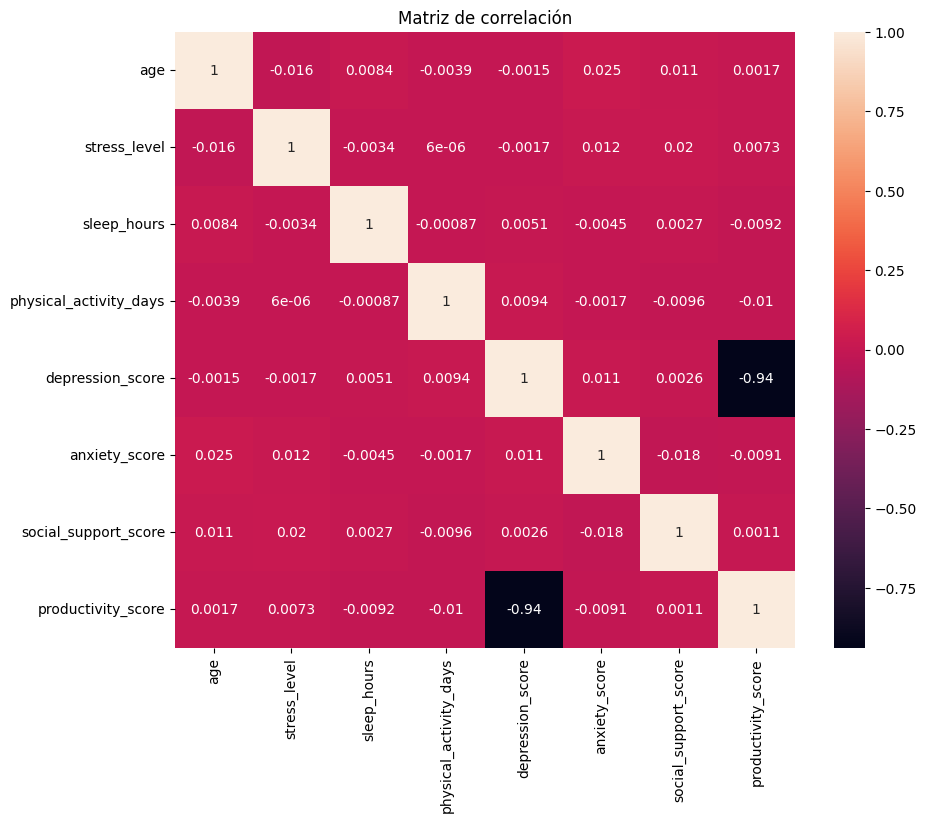

In [20]:
#Graficamos la matriz de correlación

fix, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=, ax=ax)
plt.title('Matriz de correlación')
plt.show()